In [46]:
import torch

def generate_data():
    # 本函数生成0-9，10个数字的图片矩阵
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    image_label=[0,1,2,3,4,5,6,7,8,9]
    return image_data,image_label
import matplotlib.pyplot as plt
image_data ,image_label= generate_data()

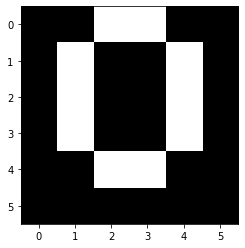

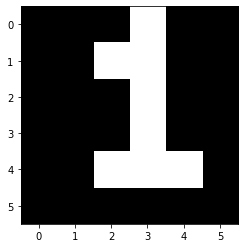

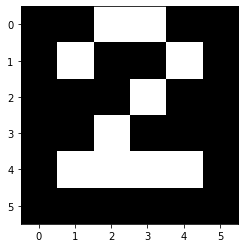

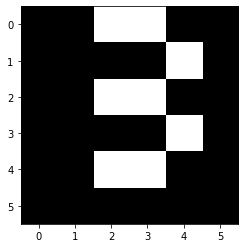

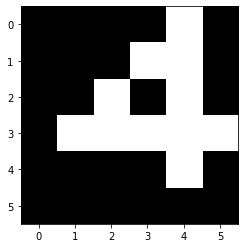

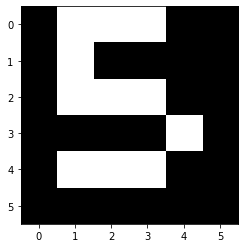

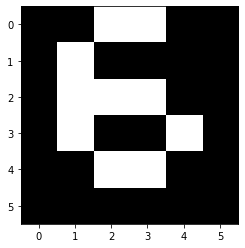

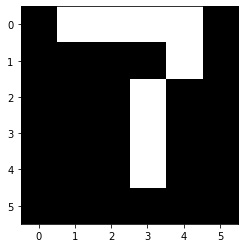

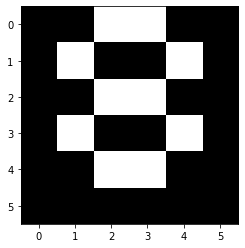

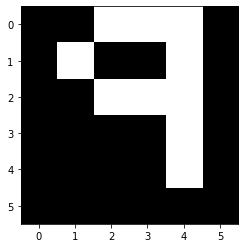

In [47]:
for i in range(10):
    plt.imshow(image_data[i],cmap='gray')
    plt.show()

In [55]:
def get_feature(x):
    feature=[0,0,0,0]
    # 下面添加提取图像x的特征feature的代码
    def get_shadow(x,dim):
        feature  =torch.sum(x,dim)
        feature = feature.float()
        # 归一化
        for i in range(0,feature.shape[0]):
            feature[i]=feature[i]/sum(feature)
        feature = feature.view(1,6)
        return feature
    feature  = torch.cat((get_shadow(x,0),get_shadow(x,1)),1)
    return feature

In [60]:
from torch.autograd import Variable
def train_model(image_data,image_label,weights):
    weights=Variable(weights,requires_grad=True)
    for epoch in range(0,7000):
        loss = 0 
        #for i in range(0,len(image_data)):
        for i in range(10):
            feature = get_feature(image_data[i])
            y = feature.mm(weights)
            loss = (y-image_label[i])*(y-image_label[i])
            loss.backward()
            #print("loss=%s"%(loss))
            #weights =
            # 更新公式
            # w  = w - (y-y1)*x*lr
            weights.data = weights.data - weights.grad.data*0.1
            weights.grad.data = torch.zeros(12,1)
        print("epoch=%s,loss=%s,weights=%s"%(epoch,loss.item(),weights.view(12)))
        loss=0
    return weights


In [61]:
weights = torch.zeros(12,1)
weights=train_model(image_data,image_label,weights)

epoch=0,loss=tensor([[11.8641]], grad_fn=<MulBackward0>),weights=tensor([0.0000, 0.7554, 1.3556, 2.3343, 2.9275, 0.2377, 1.1578, 0.9233, 1.5616,
        1.6704, 2.6587, 0.0000], grad_fn=<ViewBackward>)
epoch=1,loss=tensor([[9.3261]], grad_fn=<MulBackward0>),weights=tensor([0.0000, 0.7708, 1.4089, 2.3563, 2.9977, 0.3342, 1.4556, 0.8353, 1.9188,
        1.8573, 2.3215, 0.0000], grad_fn=<ViewBackward>)
epoch=2,loss=tensor([[8.4943]], grad_fn=<MulBackward0>),weights=tensor([0.0000, 0.7705, 1.4372, 2.3434, 2.9825, 0.4145, 1.7222, 0.7274, 2.2318,
        1.9878, 1.9401, 0.0000], grad_fn=<ViewBackward>)
epoch=3,loss=tensor([[7.8262]], grad_fn=<MulBackward0>),weights=tensor([0.0000, 0.7713, 1.4700, 2.3465, 2.9519, 0.4839, 1.9781, 0.6233, 2.5296,
        2.0996, 1.5822, 0.0000], grad_fn=<ViewBackward>)
epoch=4,loss=tensor([[7.2630]], grad_fn=<MulBackward0>),weights=tensor([0.0000, 0.7731, 1.5070, 2.3638, 2.9103, 0.5445, 2.2242, 0.5236, 2.8139,
        2.1967, 1.2462, 0.0000], grad_fn=<ViewBackw

In [65]:
print("对每张图片进行识别")
for i in range(10):
    x=image_data[i]
    feature=get_feature(x)
    # 对提取到得特征进行分类
    y = feature.mm(weights)
    #打印出分类结果
    print("图像[%s]得分类结果是:[%s],它得特征是[%s]"%(i,y.item(),feature))

对每张图片进行识别
图像[0]得分类结果是:[0.19911611080169678],它得特征是[tensor([[0.0000, 0.3000, 0.2740, 0.3588, 0.7628, 0.0000, 0.2000, 0.2439, 0.3104,
         0.4207, 0.6299, 0.0000]])]
图像[1]得分类结果是:[1.0896600484848022],它得特征是[tensor([[0.0000, 0.0000, 0.2500, 0.8000, 0.4878, 0.0000, 0.1250, 0.2807, 0.1850,
         0.2178, 0.7877, 0.0000]])]
图像[2]得分类结果是:[1.9027485847473145],它得特征是[tensor([[0.0000, 0.2000, 0.3659, 0.5390, 0.6442, 0.0000, 0.2000, 0.2439, 0.1552,
         0.1786, 0.8372, 0.0000]])]
图像[3]得分类结果是:[3.1504037380218506],它得特征是[tensor([[0.0000, 0.0000, 0.3750, 0.5581, 0.6819, 0.0000, 0.2500, 0.1600, 0.3697,
         0.2646, 0.6570, 0.0000]])]
图像[4]得分类结果是:[4.0503034591674805],它得特征是[tensor([[0.0000, 0.0909, 0.1982, 0.2413, 0.7657, 0.4355, 0.0909, 0.1982, 0.2413,
         0.7657, 0.4355, 0.0000]])]
图像[5]得分类结果是:[5.136970520019531],它得特征是[tensor([[0.0000, 0.3636, 0.4074, 0.6288, 0.4167, 0.0000, 0.2727, 0.1209, 0.4058,
         0.2084, 0.7486, 0.0000]])]
图像[6]得分类结果是:[5.9616827964782715],它得特征是[tensor([[0.0000